In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diabetic_data.csv')
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
data.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#Replacing '?' with NA
data.replace('?',pd.NA, inplace=True)
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),<NA>,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),<NA>,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),<NA>,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),<NA>,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),<NA>,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),<NA>,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
data.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [8]:
data = data.drop('weight', axis=1)
data = data.drop('max_glu_serum', axis=1)
data = data.drop('encounter_id',axis=1)
data = data.drop('patient_nbr',axis=1)
data = data.drop('payer_code', axis=1)

In [9]:
# print unique values in data columns
for col in data.columns:
  print(col, data[col].unique())

race ['Caucasian' 'AfricanAmerican' <NA> 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
medical_specialty ['Pediatrics-Endocrinology' <NA> 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiat

## **Visualization**

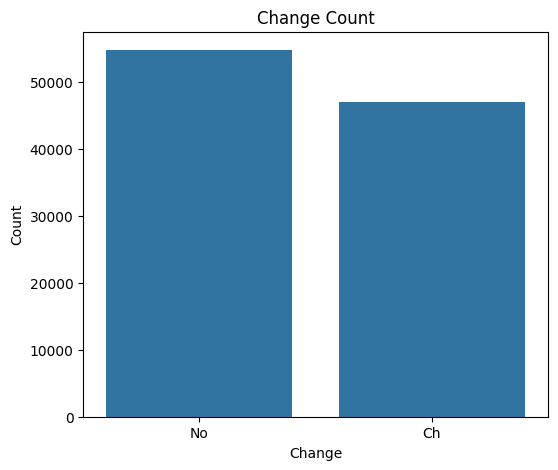

In [10]:
#using Bar chat
plt.figure(figsize=(6,5))
sns.countplot(x='change', data=data)
plt.title('Change Count')
plt.xlabel('Change')
plt.ylabel('Count')
plt.show()

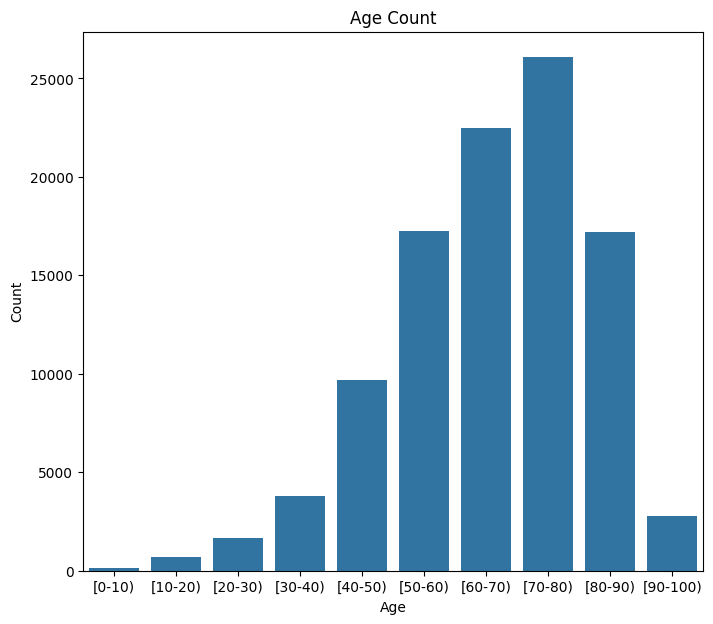

In [11]:
#using Bar chat
plt.figure(figsize=(8,7))
sns.countplot(x='age', data=data)
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

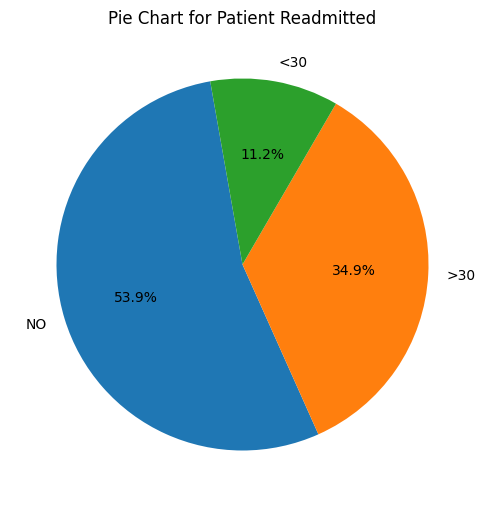

In [12]:
#Pie Chart
plt.figure(figsize=(6,7))
data['readmitted'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=100)
plt.title('Pie Chart for Patient Readmitted')
plt.ylabel('')
plt.show()

## **Encoding**

In [13]:
data[['race','medical_specialty']] = data[['race','medical_specialty']].fillna(method = 'bfill')

<ipython-input-13-36fe56e7a995>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['race','medical_specialty']] = data[['race','medical_specialty']].fillna(method = 'bfill')


In [14]:
data[['medical_specialty','diabetesMed']] = data[['medical_specialty','diabetesMed']].fillna(method = 'ffill')

<ipython-input-14-f45cf2f7fdcd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['medical_specialty','diabetesMed']] = data[['medical_specialty','diabetesMed']].fillna(method = 'ffill')


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   medical_specialty         101766 non-null  object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

In [16]:
#Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['medical_specialty']=lb.fit_transform(data['medical_specialty'])

In [17]:
# map the age values to integer
data['age'] = data['age'].map({'[0-10)': 0, '[10-20)': 1, '[20-30)':2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)':8, '[90-100)': 9})
data.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,0,6,25,1,1,37,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,1,1,1,7,3,18,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,2,1,1,7,2,18,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,3,1,1,7,2,18,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,4,1,1,7,1,18,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
#remove values that has non numeric values on column diag_1
data = data[data[['diag_1','diag_2','diag_3']].apply(lambda x: x.str.isnumeric(), axis=1).all(axis=1)]
data['diag_1'].unique()

array(['197', '414', '428', '398', '434', '157', '518', '999', '410',
       '682', '402', '737', '572', '189', '786', '427', '473', '174',
       '486', '998', '511', '432', '295', '196', '618', '845', '423',
       '722', '784', '707', '151', '997', '198', '564', '812', '996',
       '403', '38', '556', '411', '578', '569', '536', '255', '599',
       '584', '560', '577', '730', '188', '332', '291', '562', '510',
       '401', '263', '276', '438', '493', '642', '491', '625', '571',
       '738', '593', '456', '446', '575', '820', '515', '780', '296',
       '235', '574', '162', '724', '282', '281', '435', '590', '715',
       '440', '789', '191', '557', '277', '711', '185', '202', '280',
       '553', '225', '154', '441', <NA>, '507', '386', '156', '200',
       '348', '558', '459', '426', '388', '337', '466', '82', '531',
       '530', '596', '288', '824', '656', '787', '433', '492', '220',
       '516', '566', '210', '922', '808', '885', '648', '969', '227',
       '112', '404', '7

In [19]:
data['diag_2'].unique()

array(['157', '411', '492', '427', '198', '288', '998', '507', '174',
       '425', '456', '401', '496', '428', '410', '996', '585', '135',
       '244', '41', '571', '997', '599', '424', '491', '553', '493',
       '242', '357', '511', '196', '396', '197', '414', '276', '250',
       '577', '535', '413', '285', '53', '566', '486', '8', '340', '574',
       '228', '403', '530', '294', '567', '512', '305', '729', '780',
       '648', '618', '70', '581', '444', '578', '277', '781', '560',
       '426', '402', '272', '733', '34', '881', '203', '440', '293',
       '999', '787', '342', '573', '303', '584', '415', '284', '569',
       '682', '292', '435', '280', '290', '398', '319', '711', '446',
       '255', '38', '788', '784', '300', '562', '162', '707', '287',
       '447', '789', '591', '200', '518', '117', '154', '786', '847',
       '852', '816', '642', '575', '416', '412', '441', '515', '482',
       '112', '382', '790', '710', '572', '576', '432', '295', '204',
       '785', '466',

In [20]:
data['diag_3'].unique()


array(['250', '38', '486', '197', '427', '627', '996', '414', '416',
       '714', '428', '582', '482', '585', '278', '568', '618', '305',
       '496', '424', '518', '403', '553', '276', '794', '401', '531',
       '511', '490', '562', '411', '784', '491', '730', '789', '529',
       '263', '425', '595', '303', '560', '8', '492', '332', '438', <NA>,
       '654', '599', '737', '681', '280', '440', '588', '244', '569',
       '272', '997', '584', '426', '196', '998', '535', '891', '284',
       '458', '648', '780', '41', '285', '593', '413', '493', '564',
       '356', '292', '782', '715', '348', '788', '459', '437', '507',
       '397', '572', '805', '453', '736', '402', '576', '533', '703',
       '349', '331', '608', '716', '282', '571', '596', '287', '644',
       '682', '162', '198', '218', '412', '396', '570', '433', '255',
       '882', '300', '711', '577', '729', '836', '707', '295', '443',
       '281', '304', '153', '410', '616', '799', '578', '601', '291',
       '512', '598

In [21]:
#Filling missing data
data['diag_1'] = data['diag_1'].fillna(data['diag_1'].mode()[0])
data['diag_2'] = data['diag_2'].fillna(data['diag_2'].mode()[0])
data['diag_3'] = data['diag_3'].fillna(data['diag_3'].mode()[0])

<ipython-input-21-7e624d6f4155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diag_1'] = data['diag_1'].fillna(data['diag_1'].mode()[0])
<ipython-input-21-7e624d6f4155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diag_2'] = data['diag_2'].fillna(data['diag_2'].mode()[0])
<ipython-input-21-7e624d6f4155>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [22]:
#Encoding the A1Cresult
data['A1Cresult'] = data['A1Cresult'].map({'>7':2, 'Norm':1, '>8':3})

<ipython-input-22-6926646ad2b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['A1Cresult'] = data['A1Cresult'].map({'>7':2, 'Norm':1, '>8':3})


In [23]:
#Filling the misssing data
data['A1Cresult'] = data['A1Cresult'].fillna(data['A1Cresult'].median())

<ipython-input-23-06435bee9e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['A1Cresult'] = data['A1Cresult'].fillna(data['A1Cresult'].median())


In [24]:
data.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
medical_specialty,0
num_lab_procedures,0
num_procedures,0


In [25]:
data['race'] = data['race'].map({'Caucasian':0, 'AfricanAmerican':1, 'Other':4, 'Asian':2, 'Hispanic':3})

In [26]:
data['gender'] = data['gender'].map({'Male':1, 'Female':0, 'Unknown/Invalid':2})

In [27]:
for col in data.columns:
  print(col, data[col].unique())

race [0 1 4 2 3]
gender [1 0 2]
age [4 5 7 8 9 6 3 2 1 0]
admission_type_id [1 2 3 6 4 5 8 7]
discharge_disposition_id [ 1  3  6  2 11 25  5 10 14  7  4 18  8 13 12 16 17 22 23 20 15  9 28 24
 19 27]
admission_source_id [ 7  2  4  1  5  6 20  3 17  8  9 10 14 11 25 22]
time_in_hospital [ 1  3  5 13 12  7 10  4  6  2  9 11 14  8]
medical_specialty [18 11  3 62 27 12 60 28 19 47 51  8 24 15 61 64  9 71 35 33 37 20  2 53
 22 38 50 49 41 13 40 66 67 26 65 30 43 68 17 45  1 25 36  0 34  6 58 69
 29 63 48 59 44 14 46 55 23 70 52 32 57 56 16 31  4 42 21 10  5 54]
num_lab_procedures [ 51  31  73  68  33  62  55  49  75  45  29  35  42  66  36  47  19  64
  52  37  46  59  72   2  65  67  40  44  53  54  58  57  25  32  28  34
  41  39  10  27  56  22  48  61  70  60  69   1  82  38   9  63  50  71
  11  77  81  76  93  43  78  80  85  15  12  30  24  17  26   5  87  95
  14  74  23  13  86  79  84  98  18  90  20   6 102   8 100  21  88   7
  91  16  94  92  83  96   4  97  89 101   3 114 113 

In [28]:
mapping = {'Up':2, 'Down':3, 'Steady':1, 'No':0}
data['insulin'] = data['insulin'].map(mapping)
data['glyburide-metformin']=data['glyburide-metformin'].map(mapping)
data['metformin']=data['metformin'].map(mapping)
data['repaglinide']=data['repaglinide'].map(mapping)
data['nateglinide']=data['nateglinide'].map(mapping)
data['chlorpropamide']=data['chlorpropamide'].map(mapping)
data['glimepiride']=data['glimepiride'].map(mapping)
data['glipizide']=data['glipizide'].map(mapping)
data['glyburide']=data['glyburide'].map(mapping)
data['pioglitazone']=data['pioglitazone'].map(mapping)
data['rosiglitazone']=data['rosiglitazone'].map(mapping)
data['acarbose']=data['acarbose'].map(mapping)
data['miglitol']=data['miglitol'].map(mapping)
data['tolazamide']=data['tolazamide'].map(mapping)



In [29]:
mapping1={'No':0,'Steady':1}
data['acetohexamide']=data['acetohexamide'].map(mapping1)
data['tolbutamide']=data['tolbutamide'].map(mapping1)
data['troglitazone']=data['troglitazone'].map(mapping1)
data['glipizide-metformin']=data['glipizide-metformin'].map(mapping1)
data['metformin-rosiglitazone']=data['metformin-rosiglitazone'].map(mapping1)
data['metformin-pioglitazone']=data['metformin-pioglitazone'].map(mapping1)
data['citoglipton']=data['citoglipton'].map(mapping1)
data['examide']=data['examide'].map(mapping1)


In [30]:
data['change']=data['change'].map({'Ch':1, 'No':0})

In [31]:
data['change']=data['change'].astype(int)

In [32]:
data['glimepiride-pioglitazone']=data['glimepiride-pioglitazone'].map({'No':0})

In [33]:
data['readmitted']=data['readmitted'].map({'NO':0, '>30':2 ,'<30':1})

In [34]:
data['diabetesMed']=data['diabetesMed'].map({'Yes':1,'No':0})

In [35]:
data.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4,0,1,4,1,1,7,1,18,51,0,...,0,1,0,0,0,0,0,1,1,0
5,0,1,5,2,1,2,3,18,31,6,...,0,1,0,0,0,0,0,0,1,2
7,0,1,7,1,1,7,5,18,73,0,...,0,0,0,0,0,0,0,0,1,2
8,0,0,8,2,1,4,13,18,68,2,...,0,1,0,0,0,0,0,1,1,0
9,0,0,9,3,3,4,12,18,33,3,...,0,1,0,0,0,0,0,1,1,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74560 entries, 4 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      74560 non-null  int64  
 1   gender                    74560 non-null  int64  
 2   age                       74560 non-null  int64  
 3   admission_type_id         74560 non-null  int64  
 4   discharge_disposition_id  74560 non-null  int64  
 5   admission_source_id       74560 non-null  int64  
 6   time_in_hospital          74560 non-null  int64  
 7   medical_specialty         74560 non-null  int64  
 8   num_lab_procedures        74560 non-null  int64  
 9   num_procedures            74560 non-null  int64  
 10  num_medications           74560 non-null  int64  
 11  number_outpatient         74560 non-null  int64  
 12  number_emergency          74560 non-null  int64  
 13  number_inpatient          74560 non-null  int64  
 14  diag_1    

In [37]:
#Splitting data
y=data['readmitted']
X=data.drop('readmitted', axis=1)


In [38]:
y.head()

,readmitted
4,0
5,2
7,2
8,0
9,0


In [39]:
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
4,0,1,4,1,1,7,1,18,51,0,...,0,0,1,0,0,0,0,0,1,1
5,0,1,5,2,1,2,3,18,31,6,...,0,0,1,0,0,0,0,0,0,1
7,0,1,7,1,1,7,5,18,73,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,8,2,1,4,13,18,68,2,...,0,0,1,0,0,0,0,0,1,1
9,0,0,9,3,3,4,12,18,33,3,...,0,0,1,0,0,0,0,0,1,1


In [40]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
norm_scaler= MinMaxScaler()
X = norm_scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((55920, 44), (18640, 44), (55920,), (18640,))

# **Unsupervised Learning**

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [43]:
# Determine optimal K using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


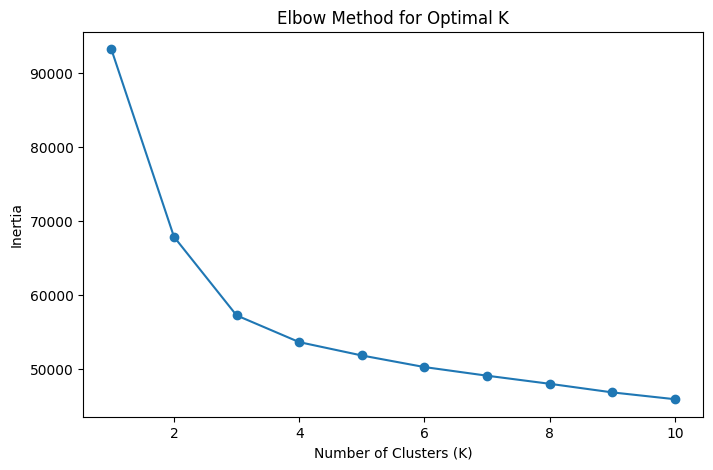

In [44]:
# plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [45]:
# Apply K-Means with the chosen K (e.g., K=3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

In [46]:
# Add cluster labels to the dataframe
data['Cluster'] = clusters

In [47]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

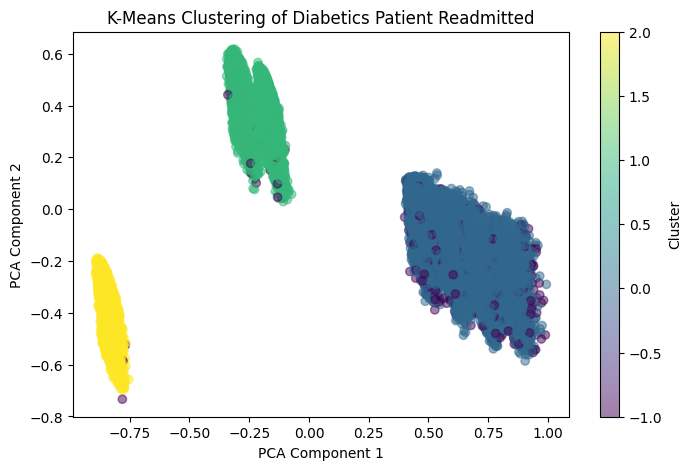

In [54]:
# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Diabetics Patient Readmitted')
plt.colorbar(label="Cluster")
plt.show()

**DBSCAN**

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [50]:
# Applying DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)
clusters = dbscan.fit_predict(X)

In [51]:
data['Cluster'] = clusters

cluster_counts = pd.Series(clusters).value_counts()
print("\nCluster Counts:\n", cluster_counts)


Cluster Counts:
  0    32029
 1    23433
 2    18318
-1      780
Name: count, dtype: int64


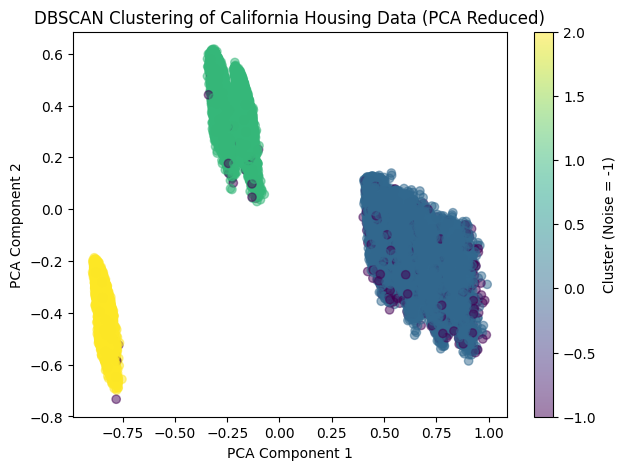

In [53]:
# PCA for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Scatter plot of clusters
plt.figure(figsize=(7, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of California Housing Data (PCA Reduced)')
plt.colorbar(label="Cluster (Noise = -1)")
plt.show()
